C:\Users\lohan\AppData\Local\Temp\ipykernel_19220\1817011307.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

FOOD

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

WEEK: 2024-02-23 to 2024-02-29


This week spent on food so far: $62.40
Weekly average spent on food: $103.15
Weekly median spent on food: $110.67
Days until the end of this week: 4


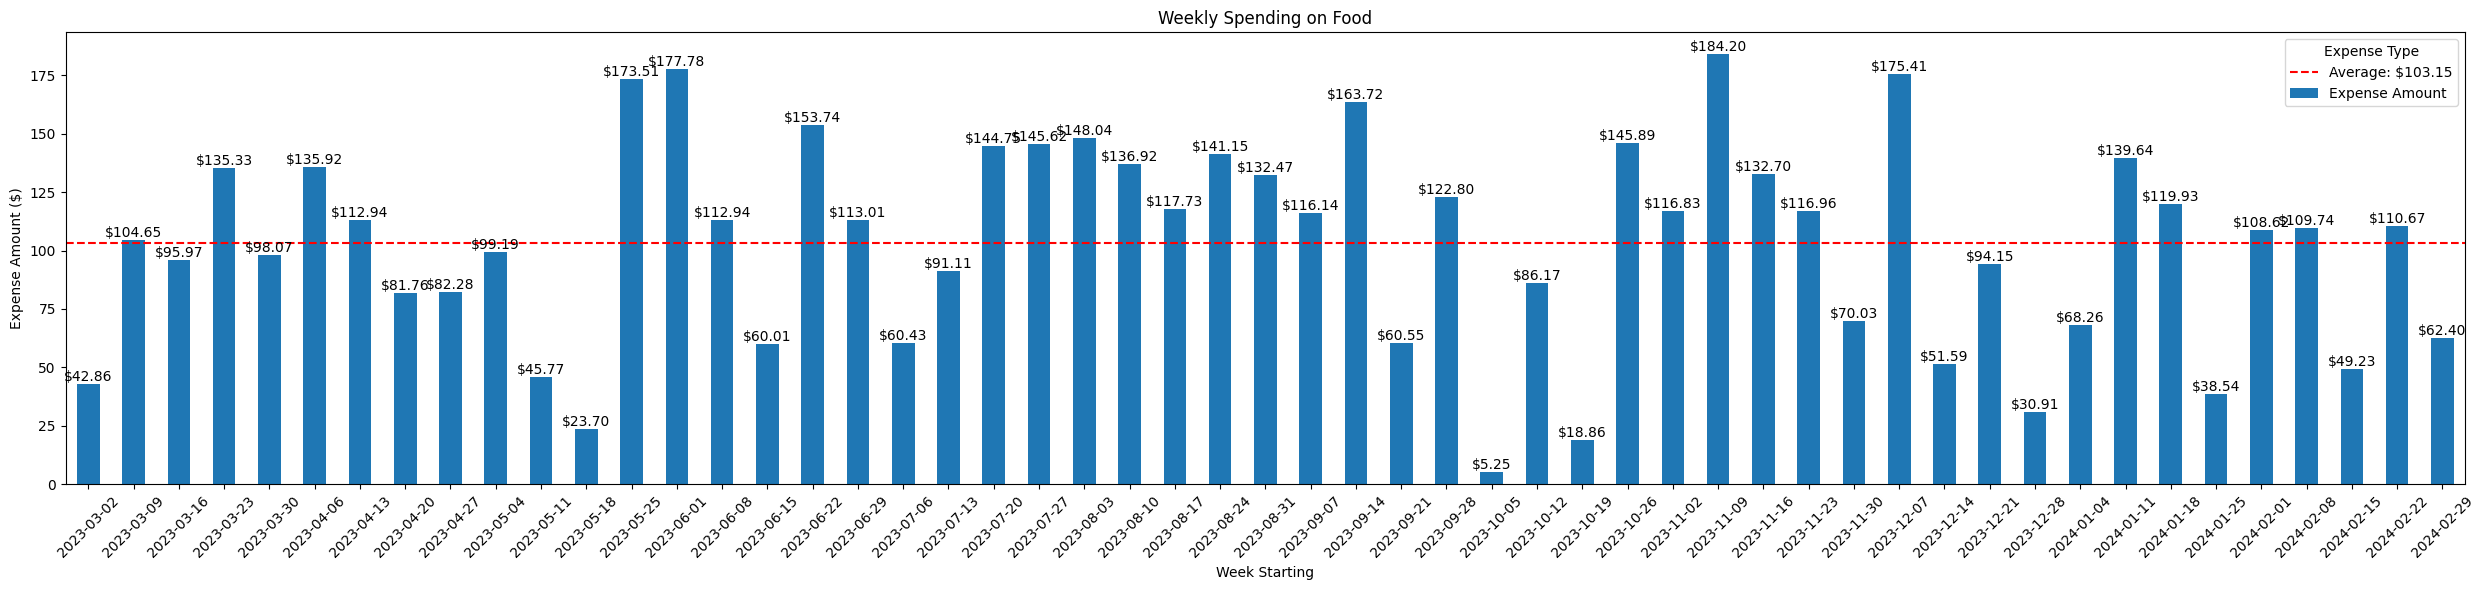


WEEK: 2024-02-23 to 2024-02-29

This week spent on Restaurants/Fast Food so far: $62.40
Weekly average spent on Restaurants/Fast Food: $51.12
Weekly median spent on Restaurants/Fast Food: $46.18
Days until the end of this week: 4

WEEK: 2024-02-23 to 2024-02-29

This week spent on Groceries so far: $0.00
Weekly average spent on Groceries: $54.07
Weekly median spent on Groceries: $52.46
Days until the end of this week: 4

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


MONTH: 2024-02-01 to 2024-02-29

This month spent on food so far: $344.48
Monthly average on food: $420.53
Monthly median spent on food: $420.76
Days until the end of this month: 4

MONTH: 2024-02-01 to 2024-02-29

This month spent on Restaurants/Fast Food so far: $228.90
Monthly average on Restaurants/Fast Food: $208.41
Monthly median spent on Restaurants/Fast Food: $228.9
Days until the end of this month: 4

MONTH: 2024-02-01 to 2024-02-29

This month spent on Groceries so far: $115.58
Monthly average on Groceries: $229.7

In [2]:
# COMECO (Importar os dados)

########################################
#         Data Import from Sheets      #
########################################
import gspread
import pandas as pd
from datetime import datetime, timedelta
import calendar
import matplotlib.pyplot as plt
from oauth2client.service_account import ServiceAccountCredentials

# Set up credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('C:/Users/lohan/PythonProjects/3 - Finances/finances-411402-17fda5da6f27.json', scope)
client = gspread.authorize(creds)


# Open Spreadsheet based on sheet key
spreadsheet_key = '1K-EDM6ETO7yH-x-yFHSdqgxGxTufGSboxYvvpZF1nKo'
spreadsheet = client.open_by_key(spreadsheet_key)


# Open specific Sheet based on title
sheet_title = 'Expenses'  
sheet = spreadsheet.worksheet(sheet_title)

# Extract all of the data
data = sheet.get_all_records()

# Convert from JSON to pandas Data Frame
data = pd.DataFrame(data)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')
print("FOOD\n")
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')



print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

#SILVER1
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

# Current date
current_date = datetime.now()

this_month = current_date.strftime("%B")

if current_date.weekday() >= 4:  # Friday = 4, Saturday = 5, Sunday = 6
    week_start = (current_date - timedelta(days=current_date.weekday() - 4)).replace(hour=0, minute=0, second=0)
else:
    week_start = (current_date - timedelta(days=current_date.weekday() + 3)).replace(hour=0, minute=0, second=0)

week_end = (week_start + timedelta(days=6)).replace(hour=23, minute=59, second=59)

# Filter data for the current week
current_week_data = filtered_data[(filtered_data['Timestamp'] >= week_start) & (filtered_data['Timestamp'] <= week_end)]

# Sum of expenses for the current week
current_week_expenses1 = current_week_data['Expense Amount'].sum()

# Calculate weekly average expenses on food
weekly_average_expenses1 = filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().mean()

# Days until the end of this week
days_until_end_of_week = (week_end - current_date).days

# Outputting the report
week_start_str = week_start.strftime('%Y-%m-%d')
week_end_str = week_end.strftime('%Y-%m-%d')

print(f"\nWEEK: {week_start_str} to {week_end_str}\n\n")
print(f"This week spent on food so far: ${current_week_expenses1:.2f}")
print(f"Weekly average spent on food: ${weekly_average_expenses1:.2f}")
print(f"Weekly median spent on food: ${filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().median()}")
print(f"Days until the end of this week: {days_until_end_of_week}")

############################################################################

# Resampling data to a weekly basis and summing expenses by type
weekly_resampled_data = filtered_data.groupby([pd.Grouper(key='Timestamp', freq='W-Thu')]).sum().reset_index()

# Pivot the data to have expense types as columns for plotting
pivot_data = weekly_resampled_data.pivot_table(values='Expense Amount', index='Timestamp', aggfunc='sum')

average_spending = pivot_data.mean().sum()


# Plotting the weekly spending with different colors for each expense type, stacked
plt.figure(figsize=(25, 6))
ax = pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Weekly Spending on Food')
plt.xlabel('Week Starting')
plt.ylabel('Expense Amount ($)')

# Formatting the x-axis to show the start of each week
x_labels = [item.strftime('%Y-%m-%d') for item in pivot_data.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)


# Annotating values on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.2f')

plt.axhline(y=average_spending, color='r', linestyle='--', label=f'Average: ${average_spending:.2f}')


plt.legend(title='Expense Type')
plt.tight_layout()

# Display the plot
plt.show()

############################################################################

filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food'])]


# Filter data for the current week
current_week_data = filtered_data[(filtered_data['Timestamp'] >= week_start) & (filtered_data['Timestamp'] <= week_end)]

# Sum of expenses for the current week
current_week_expenses2 = current_week_data['Expense Amount'].sum()

# Calculate weekly average expenses on food
weekly_average_expenses2 = filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().mean()

print(f"\nWEEK: {week_start_str} to {week_end_str}\n")
print(f"This week spent on Restaurants/Fast Food so far: ${current_week_expenses2:.2f}")
print(f"Weekly average spent on Restaurants/Fast Food: ${weekly_average_expenses2:.2f}")
print(f"Weekly median spent on Restaurants/Fast Food: ${filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().median()}")
print(f"Days until the end of this week: {days_until_end_of_week}")

############################################################################

############################################################################

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Groceries'])]

# Filter data for the current week
current_week_data = filtered_data[(filtered_data['Timestamp'] >= week_start) & (filtered_data['Timestamp'] <= week_end)]


# Sum of expenses for the current week
current_week_expenses3 = current_week_data['Expense Amount'].sum()

# Calculate weekly average expenses on food
weekly_average_expenses3 = filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().mean()

print(f"\nWEEK: {week_start_str} to {week_end_str}\n")
print(f"This week spent on Groceries so far: ${current_week_expenses3:.2f}")
print(f"Weekly average spent on Groceries: ${weekly_average_expenses3:.2f}")
print(f"Weekly median spent on Groceries: ${filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().median()}")
print(f"Days until the end of this week: {days_until_end_of_week}")

############################################################################


# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

month_start = current_date.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
next_month_start = (month_start + timedelta(days=calendar.monthrange(month_start.year, month_start.month)[1])).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
month_end = (next_month_start - timedelta(days=1)).replace(hour=23, minute=59, second=59)

# Filter data for the current month
current_month_data = filtered_data[(filtered_data['Timestamp'] >= month_start) & (filtered_data['Timestamp'] <= month_end)]

# Sum of expenses for the current month
current_month_expenses1 = current_month_data['Expense Amount'].sum()

# Calculate monthly average expenses on food
monthly_average_expenses1 = filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().mean()

# Days until the end of the current month
days_until_end_of_month = (month_end - current_date).days

# Outputting the report
month_start_str = month_start.strftime('%Y-%m-%d')
month_end_str = month_end.strftime('%Y-%m-%d')

print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

print(f"\nMONTH: {month_start_str} to {month_end_str}\n")

print(f"This month spent on food so far: ${current_month_expenses1:.2f}")
print(f"Monthly average on food: ${monthly_average_expenses1:.2f}")
print(f"Monthly median spent on food: ${filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().median()}")
print(f"Days until the end of this month: {days_until_end_of_month}")


############################################################################

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food'])]

# Filter data for the current month
current_month_data = filtered_data[(filtered_data['Timestamp'] >= month_start) & (filtered_data['Timestamp'] <= month_end)]

# Sum of expenses for the current month
current_month_expenses2 = current_month_data['Expense Amount'].sum()

# Calculate monthly average expenses on food
monthly_average_expenses2 = filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().mean()

print(f"\nMONTH: {month_start_str} to {month_end_str}\n")

print(f"This month spent on Restaurants/Fast Food so far: ${current_month_expenses2:.2f}")
print(f"Monthly average on Restaurants/Fast Food: ${monthly_average_expenses2:.2f}")
print(f"Monthly median spent on Restaurants/Fast Food: ${filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().median()}")
print(f"Days until the end of this month: {days_until_end_of_month}")

###########################################################################

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Groceries'])]

# Filter data for the current month
current_month_data = filtered_data[(filtered_data['Timestamp'] >= month_start) & (filtered_data['Timestamp'] <= month_end)]

# Sum of expenses for the current month
current_month_expenses3 = current_month_data['Expense Amount'].sum()

# Calculate monthly average expenses on food
monthly_average_expenses3 = filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().mean()

print(f"\nMONTH: {month_start_str} to {month_end_str}\n")

print(f"This month spent on Groceries so far: ${current_month_expenses3:.2f}")
print(f"Monthly average on Groceries: ${monthly_average_expenses3:.2f}")
print(f"Monthly median spent on Groceries: ${filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().median().round(2)}")
print(f"Days until the end of this month: {days_until_end_of_month}")

In [82]:
tabela_semana = {
    ' ': ['Restaurants/Fast Food', 'Groceries', 'All Food'],
    'Actual': [f'${current_week_expenses2:.2f}', f'${current_week_expenses3:.2f}', f'${current_week_expenses1:.2f}'],
    'Average': [f'${weekly_average_expenses2:.2f}', f'${weekly_average_expenses3:.2f}', f'${weekly_average_expenses1:.2f}'],
    'Days Until End of Week': [days_until_end_of_week, days_until_end_of_week, days_until_end_of_week]
}

tabela_mes = {
    ' ': ['Restaurants/Fast Food', 'Groceries', 'All Food'],
    'Actual': [f'${current_month_expenses2:.2f}', f'${current_month_expenses3:.2f}', f'${current_month_expenses1:.2f}'],
    'Average': [f'${monthly_average_expenses2:.2f}', f'${monthly_average_expenses3:.2f}', f'${monthly_average_expenses1:.2f}'],
    'Days Until End of Month': [days_until_end_of_month, days_until_end_of_month, days_until_end_of_month]
}

tabela_mes = pd.DataFrame(tabela_mes)
tabela_semana = pd.DataFrame(tabela_semana)


print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print(f"\nTHIS WEEK: {week_start_str} to {week_end_str}\n")
print(tabela_semana)

print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

print(f"\nMONTH: {month_start_str} to {month_end_str}\n")
print(tabela_mes)

print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')


print(f'According to the average, this Week I can still spend: ${(weekly_average_expenses1 - current_week_expenses1):.2f} on food with {days_until_end_of_week} days left for the week, ${((weekly_average_expenses1 - current_week_expenses1)/days_until_end_of_week):.2f} per day')
print(f'According to the average, this Month I can still spend: ${(monthly_average_expenses1 - current_month_expenses1):.2f} on food with {days_until_end_of_month} days left for the month, ${((monthly_average_expenses1 - current_month_expenses1)/days_until_end_of_month):.2f} per day')


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

THIS WEEK: 2024-02-23 to 2024-02-29

                          Actual  Average  Days Until End of Week
0  Restaurants/Fast Food  $51.59   $50.92                       5
1              Groceries   $0.00   $54.07                       5
2               All Food  $51.59  $102.94                       5

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


MONTH: 2024-02-01 to 2024-02-29

                           Actual  Average  Days Until End of Month
0  Restaurants/Fast Food  $218.09  $207.58                        5
1              Groceries  $115.58  $229.79                        5
2               All Food  $333.67  $419.69                        5

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

According to the average, this Week I can still spend: $51.35 on food with 5 days left for the week, $10.27 per day
According to the average, this Month I can still spend: $86.02 on food with 5 days left for the mont

In [90]:
css_styles = """
<style>
    .myDataFrame {
        width: 50%;
        border-collapse: collapse;
    }
    .myDataFrame, .myDataFrame th, .myDataFrame td {
        border: 1px solid black;
    }
    .myDataFrame th, .myDataFrame td {
        padding: 10px;
        text-align: left;
    }
    .myDataFrame tr:nth-child(even) {
        background-color: #f2f2f2;
    }
    .myDataFrame th {
        background-color: #4CAF50;
        color: white;
    }
</style>
"""


tabela_semana_html = tabela_semana.to_html(index=False, classes='myDataFrame')
tabela_mes_html = tabela_mes.to_html(index=False, classes='myDataFrame')

In [104]:
import smtplib
from email.message import EmailMessage

msg = EmailMessage()
msg['Subject'] = 'Your Subject Here'
msg['From'] = 'lohan.rossi@hotmail.com'
msg['To'] = 'lohan.rossi@hotmail.com'
msg.set_content('This is an automated email. Please find the HTML version for better formatting.')

# Add the HTML version
msg.add_alternative(f"""\
<!DOCTYPE html>
<html>
    <head>
        {css_styles}
    </head>
    <body>
        <h1>FOOD EXPENSE REPORT</h1>
        <h2>THIS WEEK: {week_start_str} to {week_end_str}</h2>
        {tabela_semana_html}
        <h2>THIS MONTH: {this_month}</h2>
        {tabela_mes_html}
        <br>
        <br>
        <br>
        <h3>According to the average, this Week I can still spend: ${(weekly_average_expenses1 - current_week_expenses1):.2f} on food with {days_until_end_of_week} days left for the week, ${((weekly_average_expenses1 - current_week_expenses1)/days_until_end_of_week):.2f} per day</h3>
        <h3>According to the average, this Month I can still spend: ${(monthly_average_expenses1 - current_month_expenses1):.2f} on food with {days_until_end_of_month} days left for the month, ${((monthly_average_expenses1 - current_month_expenses1)/days_until_end_of_month):.2f} per day</h3>
    </body>
</html>
""", subtype='html')

smtp_server = 'smtp.office365.com'
port = 587  # For TLS
username = 'lohan.rossi@hotmail.com'
password = 'hotGupinho98toh'

# Connect to the server
server = smtplib.SMTP(smtp_server, port)
server.starttls()  # Upgrade the connection to secure
server.login(username, password)

# Send the email
server.send_message(msg)
server.quit()

(221, b'2.0.0 Service closing transmission channel')

In [68]:
mensagem

In [259]:
#SILVER1
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

# Current date
current_date = datetime.now()

if current_date.weekday() >= 4:  # Friday = 4, Saturday = 5, Sunday = 6
    week_start = (current_date - timedelta(days=current_date.weekday() - 4)).replace(hour=0, minute=0, second=0)
else:
    week_start = (current_date - timedelta(days=current_date.weekday() + 3)).replace(hour=0, minute=0, second=0)

week_end = (week_start + timedelta(days=6)).replace(hour=23, minute=59, second=59)

# Filter data for the current week
current_week_data = filtered_data[(filtered_data['Timestamp'] >= week_start) & (filtered_data['Timestamp'] <= week_end)]

# Sum of expenses for the current week
current_week_expenses = current_week_data['Expense Amount'].sum()

# Calculate weekly average expenses on food
weekly_average_expenses = filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().mean()

# Days until the end of this week
days_until_end_of_week = (week_end - current_date).days

# Outputting the report
week_start_str = week_start.strftime('%Y-%m-%d')
week_end_str = week_end.strftime('%Y-%m-%d')

print(f"\nWEEK: {week_start_str} to {week_end_str}\n")
print(f"This week spent on food so far: ${current_week_expenses:.2f}")
print(f"Weekly average spent on food: ${weekly_average_expenses:.2f}                            (Median: ${filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().median()})")
print(f"Days until the end of this week: {days_until_end_of_week}")



WEEK: 2024-02-23 to 2024-02-29

This week spent on food so far: $38.18
Weekly average spent on food: $102.69                            (Median: $110.67)
Days until the end of this week: 5


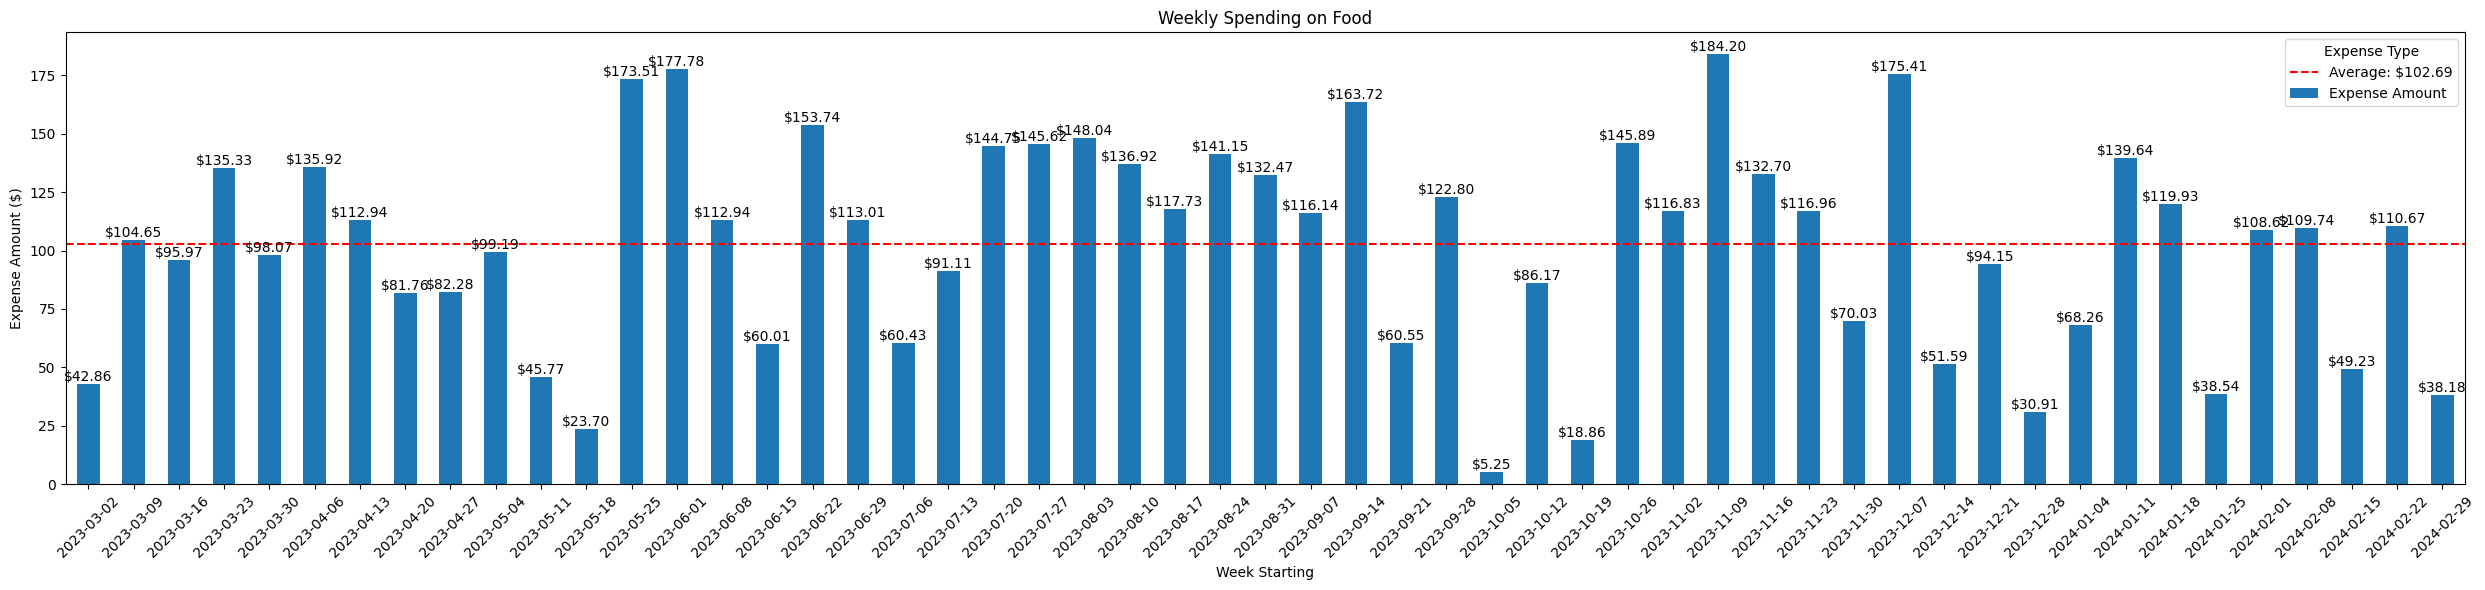

In [260]:
#GOLD8
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for the desired expense types
# For demonstration, let's assume we're still interested in 'Restaurant/Fast Food' and another type like 'Groceries'
desired_expense_types = ['Restaurant/Fast Food', 'Groceries']  # Adjust this list based on the actual types you're interested in

filtered_data = expenses_data[expenses_data['Expense Type'].isin(desired_expense_types)]

# Resampling data to a weekly basis and summing expenses by type
weekly_resampled_data = filtered_data.groupby([pd.Grouper(key='Timestamp', freq='W-Thu')]).sum().reset_index()

# Pivot the data to have expense types as columns for plotting
pivot_data = weekly_resampled_data.pivot_table(values='Expense Amount', index='Timestamp', aggfunc='sum')

average_spending = pivot_data.mean().sum()


# Plotting the weekly spending with different colors for each expense type, stacked
plt.figure(figsize=(25, 6))
ax = pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Weekly Spending on Food')
plt.xlabel('Week Starting')
plt.ylabel('Expense Amount ($)')

# Formatting the x-axis to show the start of each week
x_labels = [item.strftime('%Y-%m-%d') for item in pivot_data.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)


# Annotating values on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.2f')

plt.axhline(y=average_spending, color='r', linestyle='--', label=f'Average: ${average_spending:.2f}')


plt.legend(title='Expense Type')
plt.tight_layout()

# Display the plot
plt.show()

In [261]:
#SILVER2
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food'])]

# Current date
current_date = datetime.now()

if current_date.weekday() >= 4:  # Friday = 4, Saturday = 5, Sunday = 6
    week_start = (current_date - timedelta(days=current_date.weekday() - 4)).replace(hour=0, minute=0, second=0)
else:
    week_start = (current_date - timedelta(days=current_date.weekday() + 3)).replace(hour=0, minute=0, second=0)

week_end = (week_start + timedelta(days=6)).replace(hour=23, minute=59, second=59)

# Filter data for the current week
current_week_data = filtered_data[(filtered_data['Timestamp'] >= week_start) & (filtered_data['Timestamp'] <= week_end)]


# Sum of expenses for the current week
current_week_expenses = current_week_data['Expense Amount'].sum()

# Calculate weekly average expenses on food
weekly_average_expenses = filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().mean()

# Days until the end of this week
days_until_end_of_week = (week_end - current_date).days

# Outputting the report
week_start_str = week_start.strftime('%Y-%m-%d')
week_end_str = week_end.strftime('%Y-%m-%d')

print(f"\nWEEK: {week_start_str} to {week_end_str}\n")
print(f"This week spent on Restaurants/Fast Food so far: ${current_week_expenses:.2f}")
print(f"Weekly average spent on Restaurants/Fast Food: ${weekly_average_expenses:.2f}                            (Median: ${filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().median()})")
print(f"Days until the end of this week: {days_until_end_of_week}")


WEEK: 2024-02-23 to 2024-02-29

This week spent on Restaurants/Fast Food so far: $38.18
Weekly average spent on Restaurants/Fast Food: $50.66                            (Median: $44.54)
Days until the end of this week: 5


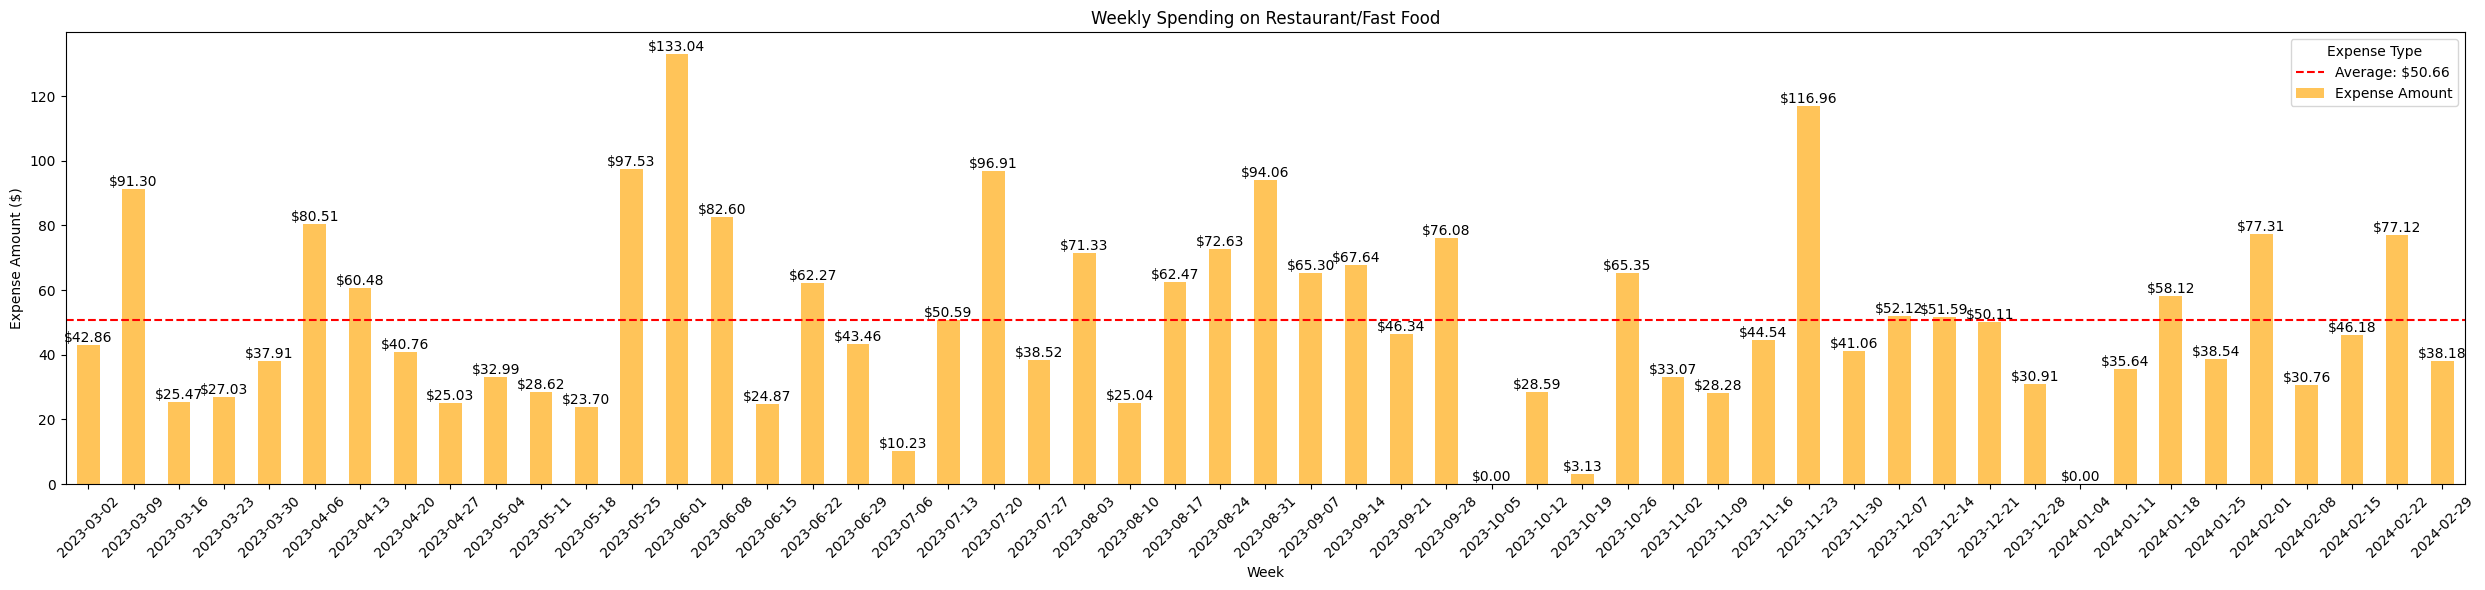

In [262]:
#GOLD5
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for only 'Restaurant/Fast Food' expense type
restaurant_data = expenses_data[expenses_data['Expense Type'] == 'Restaurant/Fast Food']

# Resampling data to a weekly basis
weekly_resampled_data = restaurant_data.resample('W-Thu', on='Timestamp').sum()

# Plotting the time series graph for 'Restaurant/Fast Food' expenses on a weekly basis
plt.figure(figsize=(25, 6))
ax = weekly_resampled_data.plot(kind='bar', color='orange', alpha=0.65, ax=plt.gca())  # Using a specific color for clarity
plt.title('Weekly Spending on Restaurant/Fast Food')
plt.xlabel('Week')
plt.ylabel('Expense Amount ($)')

# Formatting the x-axis to show the start of each week
x_labels = [item.strftime('%Y-%m-%d') for item in weekly_resampled_data.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)

# Annotating values on top of the bars with dollar format
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.2f')

# Calculate the average weekly spending on Restaurant/Fast Food
average_weekly_spending = weekly_resampled_data['Expense Amount'].mean()

# Adding a horizontal line to indicate the average weekly spending
plt.axhline(y=average_weekly_spending, color='r', linestyle='--', label=f'Average: ${average_weekly_spending:.2f}')

plt.legend(title='Expense Type')
plt.tight_layout()

# Display the plot
plt.show()

In [263]:
#SILVER3
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Groceries'])]

# Current date
current_date = datetime.now()

if current_date.weekday() >= 4:  # Friday = 4, Saturday = 5, Sunday = 6
    week_start = (current_date - timedelta(days=current_date.weekday() - 4)).replace(hour=0, minute=0, second=0)
else:
    week_start = (current_date - timedelta(days=current_date.weekday() + 3)).replace(hour=0, minute=0, second=0)

week_end = (week_start + timedelta(days=6)).replace(hour=23, minute=59, second=59)

# Filter data for the current week
current_week_data = filtered_data[(filtered_data['Timestamp'] >= week_start) & (filtered_data['Timestamp'] <= week_end)]


# Sum of expenses for the current week
current_week_expenses = current_week_data['Expense Amount'].sum()

# Calculate weekly average expenses on food
weekly_average_expenses = filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().mean()

# Days until the end of this week
days_until_end_of_week = (week_end - current_date).days

# Outputting the report
week_start_str = week_start.strftime('%Y-%m-%d')
week_end_str = week_end.strftime('%Y-%m-%d')

print(f"\nWEEK: {week_start_str} to {week_end_str}\n")
print(f"This week spent on Restaurants/Fast Food so far: ${current_week_expenses:.2f}")
print(f"Weekly average spent on Restaurants/Fast Food: ${weekly_average_expenses:.2f}                            (Median: ${filtered_data.set_index('Timestamp').resample('W-Thu')['Expense Amount'].sum().median()})")
print(f"Days until the end of this week: {days_until_end_of_week}")


WEEK: 2024-02-23 to 2024-02-29

This week spent on Restaurants/Fast Food so far: $0.00
Weekly average spent on Restaurants/Fast Food: $54.07                            (Median: $52.46)
Days until the end of this week: 5


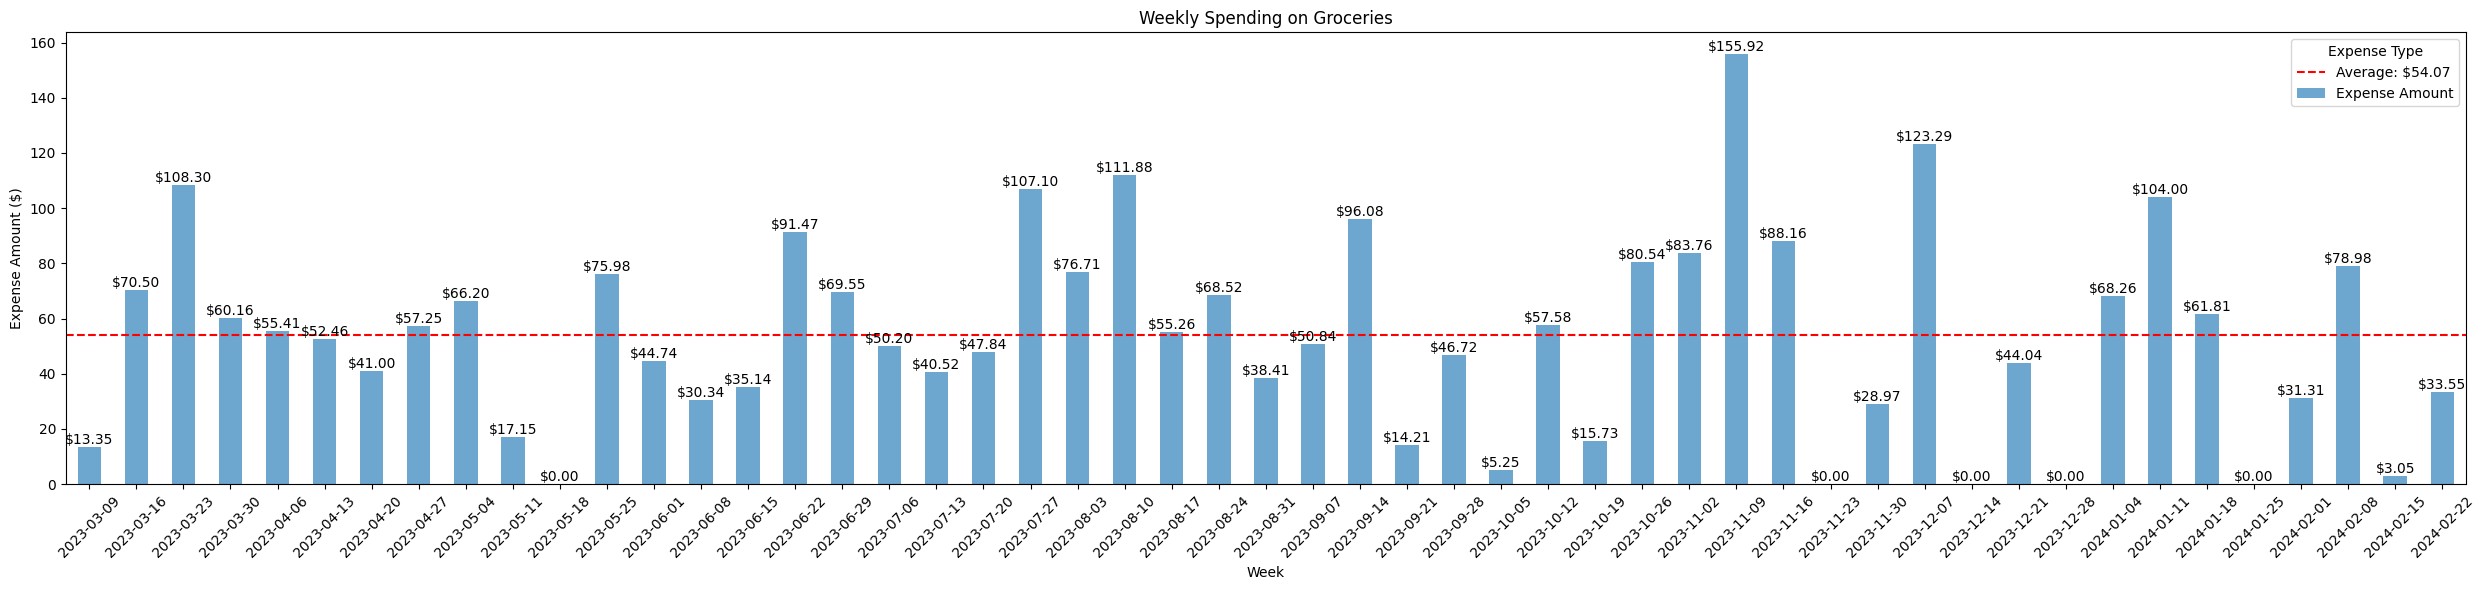

In [264]:
#GOLD6
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for only 'Restaurant/Fast Food' expense type
restaurant_data = expenses_data[expenses_data['Expense Type'] == 'Groceries']

# Resampling data to a weekly basis
weekly_resampled_data = restaurant_data.resample('W-Thu', on='Timestamp').sum()

# Plotting the time series graph for 'Restaurant/Fast Food' expenses on a weekly basis
plt.figure(figsize=(25, 6))
ax = weekly_resampled_data.plot(kind='bar', ax=plt.gca(), alpha=0.65)  # Using a specific color for clarity
plt.title('Weekly Spending on Groceries')
plt.xlabel('Week')
plt.ylabel('Expense Amount ($)')

# Formatting the x-axis to show the start of each week
x_labels = [item.strftime('%Y-%m-%d') for item in weekly_resampled_data.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)

# Annotating values on top of the bars with dollar format
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.2f')

# Calculate the average weekly spending on Restaurant/Fast Food
average_weekly_spending = weekly_resampled_data['Expense Amount'].mean()

# Adding a horizontal line to indicate the average weekly spending
plt.axhline(y=average_weekly_spending, color='r', linestyle='--', label=f'Average: ${average_weekly_spending:.2f}')

plt.legend(title='Expense Type')
plt.tight_layout()

# Display the plot
plt.show()

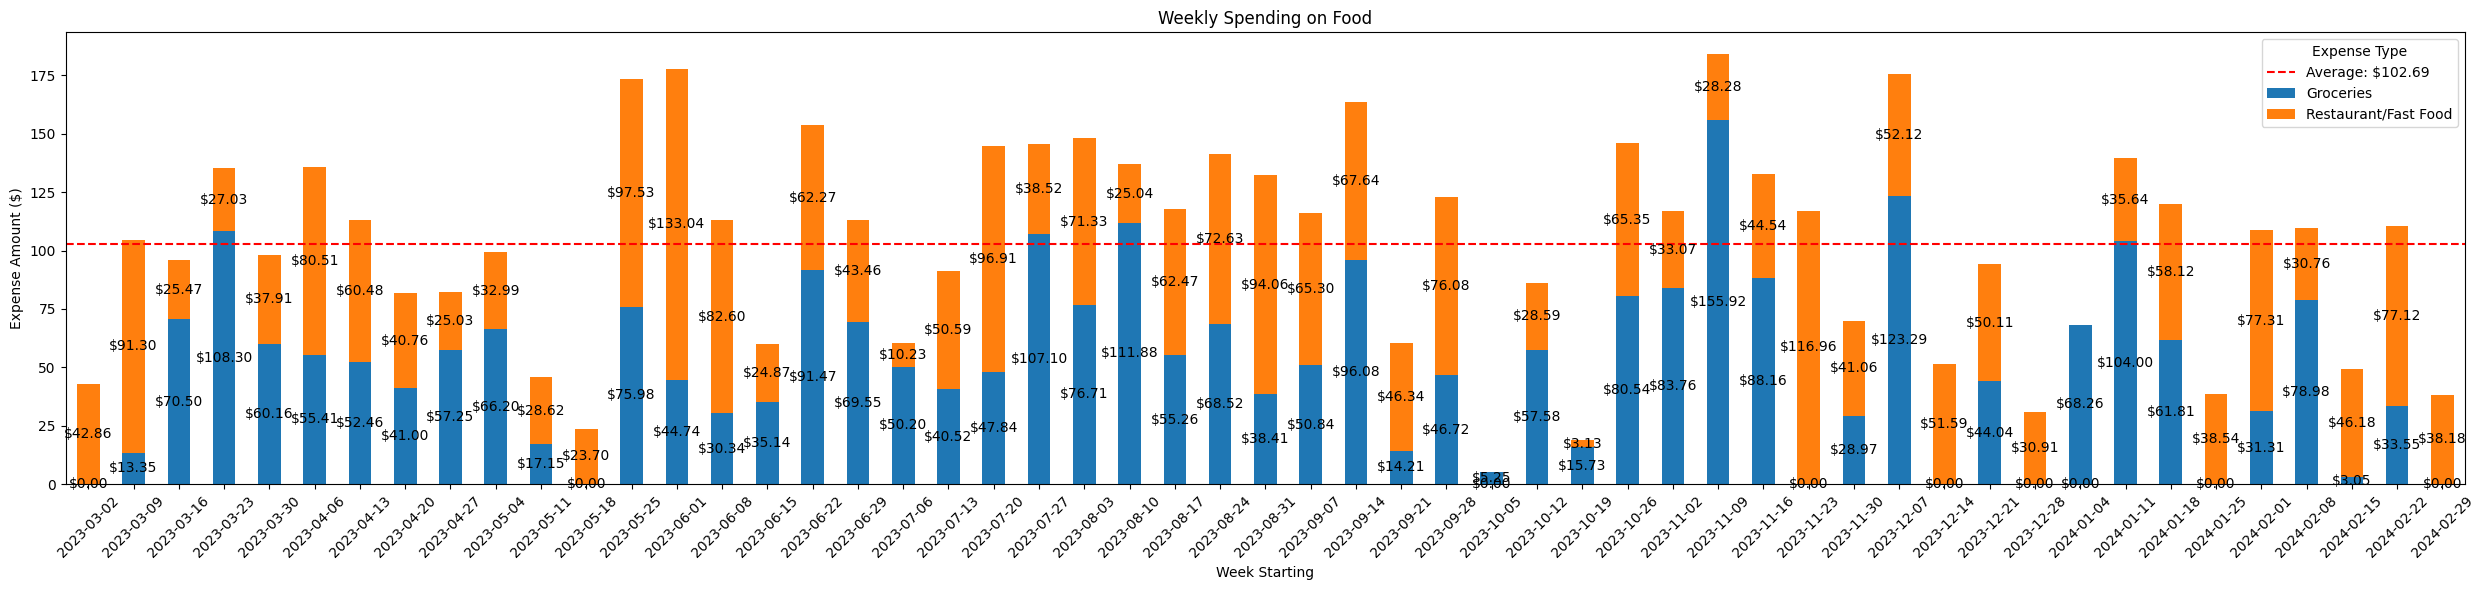

In [265]:
#GOLD7
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for the desired expense types
# For demonstration, let's assume we're still interested in 'Restaurant/Fast Food' and another type like 'Groceries'
desired_expense_types = ['Restaurant/Fast Food', 'Groceries']  # Adjust this list based on the actual types you're interested in

filtered_data = expenses_data[expenses_data['Expense Type'].isin(desired_expense_types)]

# Resampling data to a weekly basis and summing expenses by type
weekly_resampled_data = filtered_data.groupby([pd.Grouper(key='Timestamp', freq='W-Thu'), 'Expense Type']).sum().reset_index()

# Pivot the data to have expense types as columns for plotting
pivot_data = weekly_resampled_data.pivot(index='Timestamp', columns='Expense Type', values='Expense Amount').fillna(0)

average_spending = pivot_data.mean().sum()


# Plotting the weekly spending with different colors for each expense type, stacked
plt.figure(figsize=(25, 6))
ax = pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Weekly Spending on Food')
plt.xlabel('Week Starting')
plt.ylabel('Expense Amount ($)')

# Formatting the x-axis to show the start of each week
x_labels = [item.strftime('%Y-%m-%d') for item in pivot_data.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)


# Annotating values on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='$%.2f')

plt.axhline(y=average_spending, color='r', linestyle='--', label=f'Average: ${average_spending:.2f}')


plt.legend(title='Expense Type')
plt.tight_layout()

# Display the plot
plt.show()

In [266]:
########################## MONTH ##################################

In [267]:
#SILVER4
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

# Current date
current_date = datetime.now()

# Determine the start and end of the current month
month_start = current_date.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
next_month_start = (month_start + timedelta(days=calendar.monthrange(month_start.year, month_start.month)[1])).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
month_end = (next_month_start - timedelta(days=1)).replace(hour=23, minute=59, second=59)

# Filter data for the current month
current_month_data = filtered_data[(filtered_data['Timestamp'] >= month_start) & (filtered_data['Timestamp'] <= month_end)]

# Sum of expenses for the current month
current_month_expenses = current_month_data['Expense Amount'].sum()

# Calculate monthly average expenses on food
monthly_average_expenses = filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().mean()

# Days until the end of the current month
days_until_end_of_month = (month_end - current_date).days

# Outputting the report
month_start_str = month_start.strftime('%Y-%m-%d')
month_end_str = month_end.strftime('%Y-%m-%d')

print(f"\nMONTH: {month_start_str} to {month_end_str}\n")

print(f"This month spent on food so far: ${current_month_expenses:.2f}")
print(f"Monthly average on food: ${monthly_average_expenses:.2f}                                     (Median: ${filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().median()})")
print(f"Days until the end of this month: {days_until_end_of_month}")


MONTH: 2024-02-01 to 2024-02-29

This month spent on food so far: $320.26
Monthly average on food: $418.66                                     (Median: $420.76)
Days until the end of this month: 5


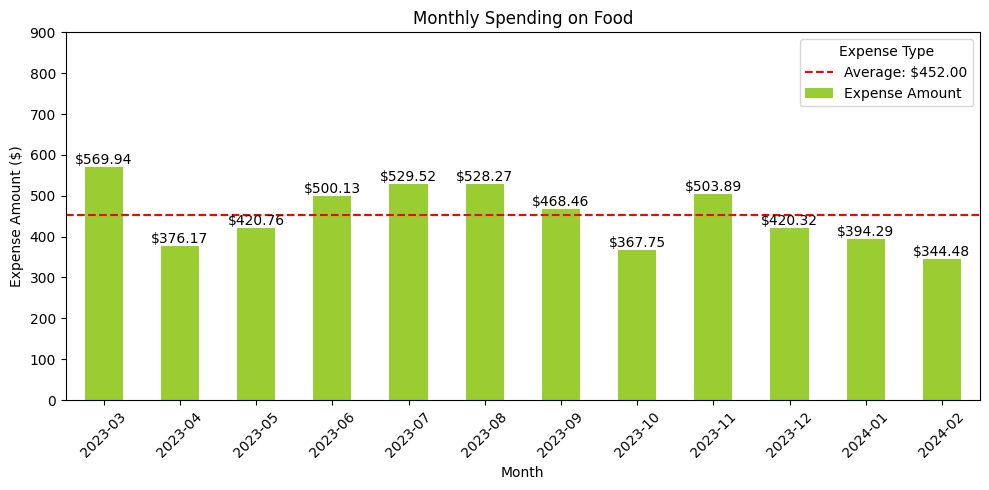

In [3]:
#GOLD 4
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filter data for 'Restaurant/Fast Food' and 'Groceries' expense types
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

filtered_data = filtered_data[filtered_data['Timestamp'].dt.to_period('M') != '2023-02']

# Creating a pivot table to separate 'Restaurant/Fast Food' and 'Groceries' expenses by month
pivot_table = filtered_data.pivot_table(values='Expense Amount', index=pd.Grouper(key='Timestamp', freq='ME'), aggfunc='sum')
pivot_table

average_spending = pivot_table.mean().mean()

# Plotting the time series graph
plt.figure(figsize=(10, 5))
ax = pivot_table.plot(kind='bar', stacked=True, ax=plt.gca(), color='yellowgreen')
plt.title('Monthly Spending on Food')
plt.xlabel('Month')
plt.ylabel('Expense Amount ($)')
plt.ylim(0,900)

# Formatting the x-axis to show Year-Month labels
x_labels = [item.strftime('%Y-%m') for item in pivot_table.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)

# Annotating values on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.2f')

plt.axhline(y=average_spending, color='r', linestyle='--', label=f'Average: ${average_spending:.2f}')

plt.legend(title='Expense Type')
plt.tight_layout()

# Display the plot
plt.show()

In [269]:
#SILVER 5
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food'])]

# Current date
current_date = datetime.now()

# Determine the start and end of the current month
month_start = current_date.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
next_month_start = (month_start + timedelta(days=calendar.monthrange(month_start.year, month_start.month)[1])).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
month_end = (next_month_start - timedelta(days=1)).replace(hour=23, minute=59, second=59)

# Filter data for the current month
current_month_data = filtered_data[(filtered_data['Timestamp'] >= month_start) & (filtered_data['Timestamp'] <= month_end)]

# Sum of expenses for the current month
current_month_expenses = current_month_data['Expense Amount'].sum()

# Calculate monthly average expenses on food
monthly_average_expenses = filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().mean()

# Days until the end of the current month
days_until_end_of_month = (month_end - current_date).days

# Outputting the report
month_start_str = month_start.strftime('%Y-%m-%d')
month_end_str = month_end.strftime('%Y-%m-%d')

print(f"\nMONTH: {month_start_str} to {month_end_str}\n")

print(f"This month spent on Restaurants/Fast Food so far: ${current_month_expenses:.2f}")
print(f"Monthly average on Restaurants/Fast Food: ${monthly_average_expenses:.2f}                                     (Median: ${filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().median()})")
print(f"Days until the end of this month: {days_until_end_of_month}")


MONTH: 2024-02-01 to 2024-02-29

This month spent on Restaurants/Fast Food so far: $204.68
Monthly average on Restaurants/Fast Food: $206.55                                     (Median: $223.43)
Days until the end of this month: 5


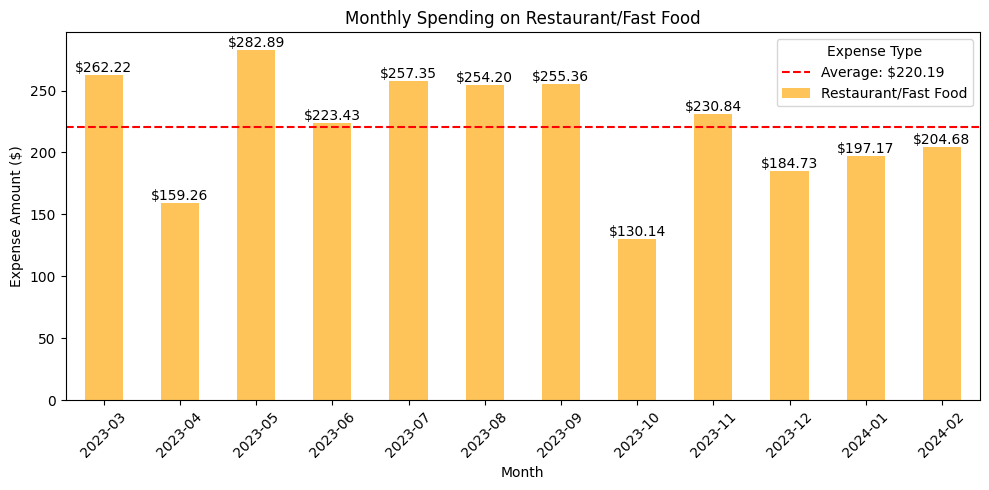

In [274]:
#GOLD 1 (Monthly Spend on Fast Food and Restaurants)
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for only 'Restaurant/Fast Food' expense type
restaurant_data = expenses_data[expenses_data['Expense Type'] == 'Restaurant/Fast Food']

restaurant_data = restaurant_data[restaurant_data['Timestamp'].dt.to_period('M') != '2023-02']

# Creating a pivot table to calculate the sum of 'Restaurant/Fast Food' expenses by month
restaurant_pivot = restaurant_data.pivot_table(values='Expense Amount', index=pd.Grouper(key='Timestamp', freq='ME'), columns='Expense Type', aggfunc='sum')

average_spending = restaurant_pivot.mean().mean()

# Plotting the time series graph for 'Restaurant/Fast Food' expenses only
plt.figure(figsize=(10, 5))
ax = restaurant_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), color='orange', alpha=0.65)  # Using a specific color for clarity
plt.title('Monthly Spending on Restaurant/Fast Food')
plt.xlabel('Month')
plt.ylabel('Expense Amount ($)')

# Formatting the x-axis to show Year-Month labels
x_labels = [item.strftime('%Y-%m') for item in restaurant_pivot.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)

# Annotating values on top of the bars with dollar format
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.2f')

plt.axhline(y=average_spending, color='r', linestyle='--', label=f'Average: ${average_spending:.2f}')


plt.legend(title='Expense Type')
plt.tight_layout()

# Display the plot
plt.show()

In [271]:
#SILVER 6
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for 'Restaurant/Fast Food' and 'Groceries' as general "food" categories
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Groceries'])]

# Current date
current_date = datetime.now()

# Determine the start and end of the current month
month_start = current_date.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
next_month_start = (month_start + timedelta(days=calendar.monthrange(month_start.year, month_start.month)[1])).replace(day=1, hour=0, minute=0, second=0, microsecond=0)
month_end = (next_month_start - timedelta(days=1)).replace(hour=23, minute=59, second=59)

# Filter data for the current month
current_month_data = filtered_data[(filtered_data['Timestamp'] >= month_start) & (filtered_data['Timestamp'] <= month_end)]

# Sum of expenses for the current month
current_month_expenses = current_month_data['Expense Amount'].sum()

# Calculate monthly average expenses on food
monthly_average_expenses = filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().mean()

# Days until the end of the current month
days_until_end_of_month = (month_end - current_date).days

# Outputting the report
month_start_str = month_start.strftime('%Y-%m-%d')
month_end_str = month_end.strftime('%Y-%m-%d')

print(f"\nMONTH: {month_start_str} to {month_end_str}\n")

print(f"This month spent on Groceries so far: ${current_month_expenses:.2f}")
print(f"Monthly average on Groceries: ${monthly_average_expenses:.2f}                                      (Median: ${filtered_data.set_index('Timestamp').resample('ME')['Expense Amount'].sum().median()})")
print(f"Days until the end of this month: {days_until_end_of_month}")


MONTH: 2024-02-01 to 2024-02-29

This month spent on Groceries so far: $115.58
Monthly average on Groceries: $229.79                                      (Median: $236.60000000000002)
Days until the end of this month: 5


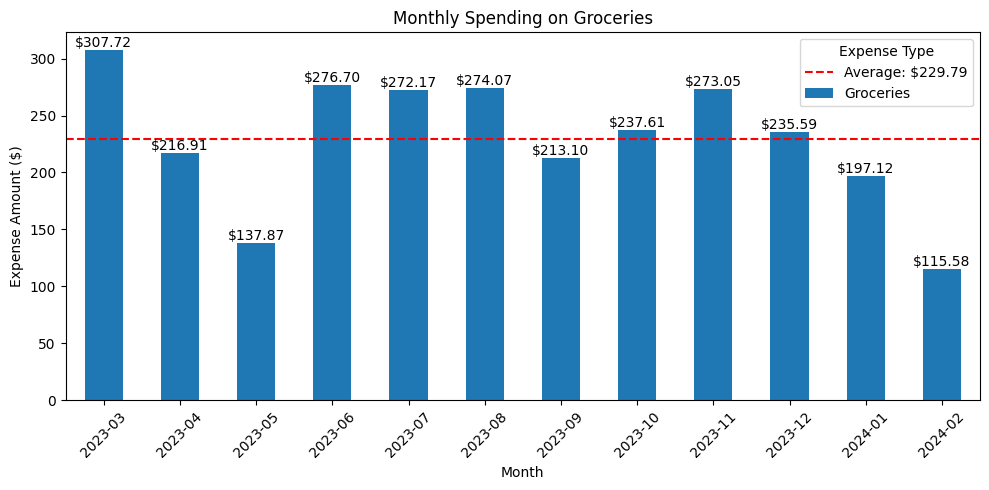

In [275]:
# GOLD 2 (Monthly Spend on Groceries)
expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filtering data for only 'Restaurant/Fast Food' expense type
restaurant_data = expenses_data[expenses_data['Expense Type'] == 'Groceries']

restaurant_data = restaurant_data[restaurant_data['Timestamp'].dt.to_period('M') != '2023-02']

# Creating a pivot table to calculate the sum of 'Restaurant/Fast Food' expenses by month
restaurant_pivot = restaurant_data.pivot_table(values='Expense Amount', index=pd.Grouper(key='Timestamp', freq='ME'), columns='Expense Type', aggfunc='sum')

average_spending = restaurant_pivot.mean().mean()

# Plotting the time series graph for 'Restaurant/Fast Food' expenses only
plt.figure(figsize=(10, 5))
ax = restaurant_pivot.plot(kind='bar', stacked=True, ax=plt.gca())  # Using a specific color for clarity
plt.title('Monthly Spending on Groceries')
plt.xlabel('Month')
plt.ylabel('Expense Amount ($)')

# Formatting the x-axis to show Year-Month labels
x_labels = [item.strftime('%Y-%m') for item in restaurant_pivot.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)

# Annotating values on top of the bars with dollar format
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.2f')

plt.axhline(y=average_spending, color='r', linestyle='--', label=f'Average: ${average_spending:.2f}')


plt.legend(title='Expense Type')
plt.tight_layout()

# Display the plot
plt.show()

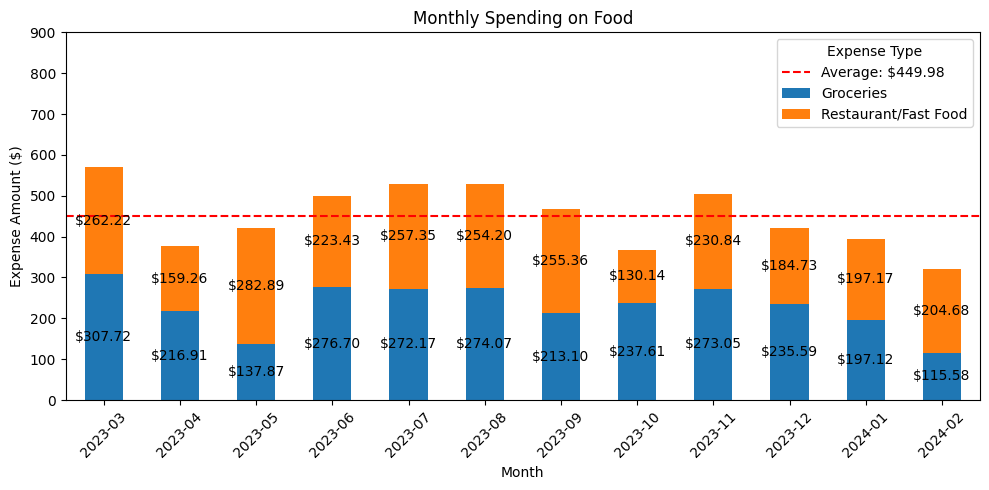

In [276]:
#GOLD 3 (Monthly expenses on food)

expenses_data = data

expenses_data['Timestamp'] = pd.to_datetime(expenses_data['Timestamp'])

# Filter data for 'Restaurant/Fast Food' and 'Groceries' expense types
filtered_data = expenses_data[expenses_data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]

filtered_data = filtered_data[filtered_data['Timestamp'].dt.to_period('M') != '2023-02']

# Creating a pivot table to separate 'Restaurant/Fast Food' and 'Groceries' expenses by month
pivot_table = filtered_data.pivot_table(values='Expense Amount', index=pd.Grouper(key='Timestamp', freq='ME'), columns='Expense Type', aggfunc='sum')

average_spending = pivot_table.mean().sum()

# Plotting the time series graph
plt.figure(figsize=(10, 5))
ax = pivot_table.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Monthly Spending on Food')
plt.xlabel('Month')
plt.ylabel('Expense Amount ($)')
plt.ylim(0,900)

# Formatting the x-axis to show Year-Month labels
x_labels = [item.strftime('%Y-%m') for item in pivot_table.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)

# Annotating values on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='$%.2f')

plt.axhline(y=average_spending, color='r', linestyle='--', label=f'Average: ${average_spending:.2f}')

plt.legend(title='Expense Type')
plt.tight_layout()

# Display the plot
plt.show()

In [287]:
#END
all_food = data[data['Expense Type'].isin(['Restaurant/Fast Food', 'Groceries'])]
all_food_expense = format(all_food['Expense Amount'].sum(), ",.2f")
print(f" All food expenses so far (February, 2023 - Today): ${all_food_expense}")


 All food expenses so far (February, 2023 - Today): $5,442.62


'February'